# NetworkX - Graph Models

_The contents of this notebook have been derived from "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master)_

Contents:

1. [Random network model](#1.-Random-Network-Model)
2. [Small-World model](#2.-Small-World-Model)
3. [Preferential attachment model](#3.-Preferential-Attachment-Model)

For each of the models presented in this tutorial, we present the algorithm, and the corresponding NetworkX code function to generate the model.

**Note:** This notebook assumes you know the basics of Network X, that were shown in the "fundamentals" notebook. It will also use concepts from the "structural properties" notebook.


In [31]:
import matplotlib.pyplot as plt
import networkx as nx

## 1. Random Network Model

The random network model, as formulated by Gilbert, has two parameters: the number of nodes $N$, and the link probability $p$. As in the book text, the algorithm for creating this network is as follows:

1. Select a pair of nodes, say i and j.
2. Generate a random number r between 0 and 1. If r < p, then add a link between i and j.
3. Repeat (1) and (2) for all pairs of nodes.


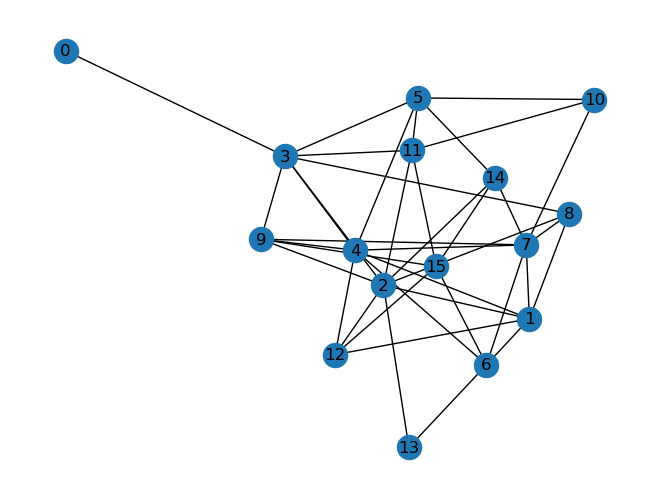

In [32]:
# Gilbert random graph with n nodes and probability p of edge creation
G_random = nx.gnp_random_graph(n=16, p=0.3)

nx.draw(G_random, with_labels=True)
plt.show()

In [33]:
print("Is connected?", nx.is_connected(G_random))
print("Number of connected components:", nx.number_connected_components(G_random))
if nx.is_connected(G_random):
    print("Average shortest path length:", nx.average_shortest_path_length(G_random))
else:
    print("Graph is not connected")
print("Average clustering coefficient:", nx.average_clustering(G_random))

Is connected? True
Number of connected components: 1
Average shortest path length: 1.775
Average clustering coefficient: 0.2418154761904762


The betweeness centrality of random networks is uniformly distributed, and the degree distribution follows a Poisson distribution. The average degree of a random network is given by $\langle k \rangle = p(N-1)$.


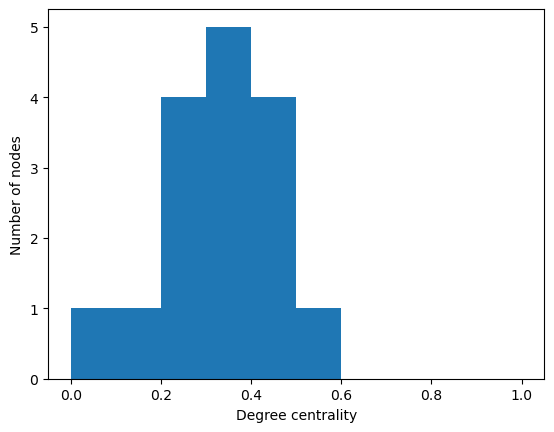

In [34]:
# Plot the centrality distribution
d_centrality = nx.degree_centrality(G_random)
ls_centralities = list(d_centrality.values())
plt.hist(ls_centralities, bins=10, range=(0, 1))
plt.xlabel("Degree centrality")
plt.ylabel("Number of nodes")
plt.show()

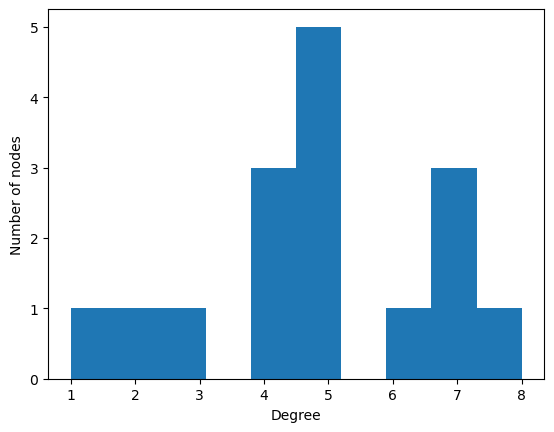

In [35]:
# Plot the degree distribution
d_degree = dict(G_random.degree())
ls_degrees = list(d_degree.values())
plt.hist(ls_degrees, bins=10)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

### Erdös-Rényi random graph model

Instead of specifying the link probability $p$, we can also generate a graph of $N$ nodes with exactly $M$ edges by using `random.sample()` to choose M of the possible edges generated with `itertools.combinations()`:


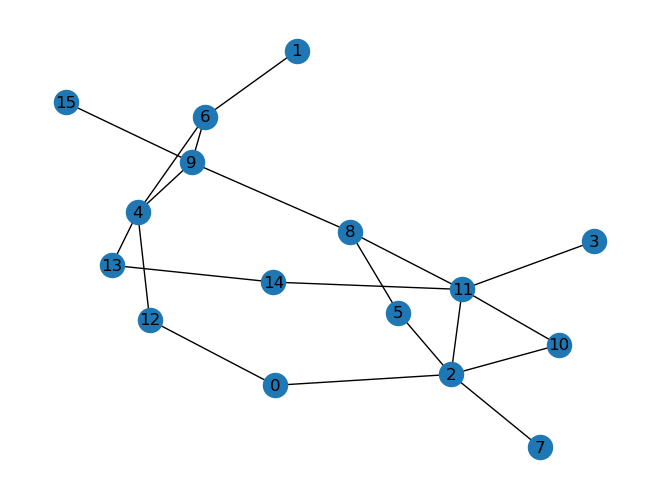

In [36]:
# Erdos-Renyi graph with n nodes and m edges
G_ER = nx.gnm_random_graph(n=16, m=20)

nx.draw(G_ER, with_labels=True)
plt.show()

In [37]:
print("Is connected?", nx.is_connected(G_ER))
print("Number of connected components:", nx.number_connected_components(G_ER))
if nx.is_connected(G_ER):
    print("Average shortest path length:", nx.average_shortest_path_length(G_ER))
else:
    print("Graph is not connected")
print("Average clustering coefficient:", nx.average_clustering(G_ER))

Is connected? True
Number of connected components: 1
Average shortest path length: 2.6333333333333333
Average clustering coefficient: 0.11666666666666667


The betweeness centrality of random networks is uniformly distributed, and the degree distribution follows a Poisson distribution. The average degree of a random network is given by $\langle k \rangle = p(N-1)$.


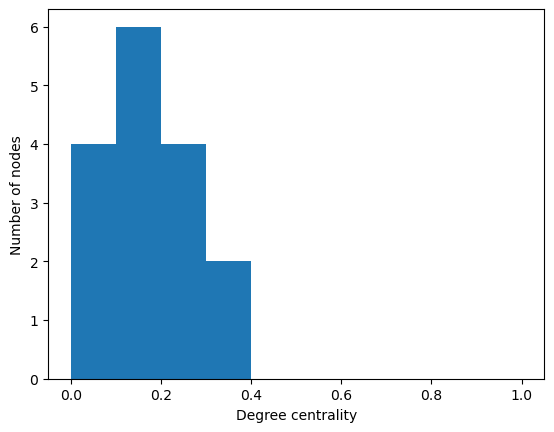

In [38]:
d_centrality = nx.degree_centrality(G_ER)
ls_centralities = list(d_centrality.values())
plt.hist(ls_centralities, bins=10, range=(0, 1))
plt.xlabel("Degree centrality")
plt.ylabel("Number of nodes")
plt.show()

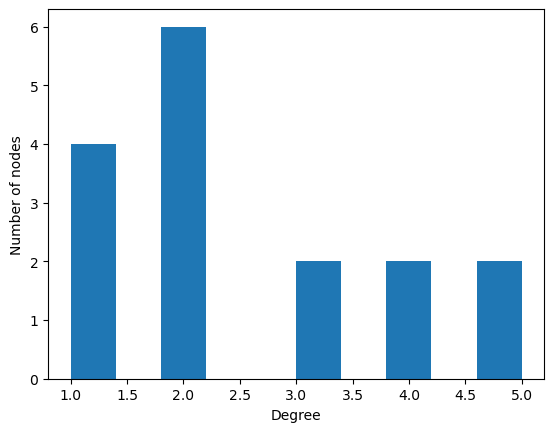

In [45]:
# Plot the degree distribution
d_degree = dict(G_ER.degree())
ls_degrees = list(d_degree.values())
plt.hist(ls_degrees, bins=10)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

---


## 2. Small-World Model

The algorithm for generating a small-world network is as such:

1. Begin with a ring of $N$ nodes
2. Connect each node to its $k$ nearest neighbors (or $k-1$ if k is odd).
3. For each edge $(u, v)$, with probability $p$, replace edge $(u, v)$ with $(u, w)$ where $w$ is not a neighbor of $u$.


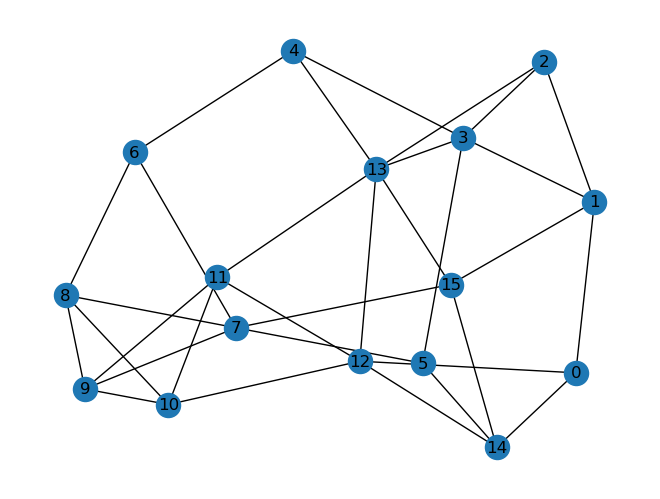

In [39]:
# Watts-Strogatz small-world graph with n nodes, k neighbors, and probability p of rewiring
G_SW = nx.watts_strogatz_graph(n=16, k=4, p=0.2)

nx.draw(G_SW, with_labels=True)
plt.show()

In [40]:
print("Is connected?", nx.is_connected(G_SW))
print("Number of connected components:", nx.number_connected_components(G_SW))
print("Average shortest path length:", nx.average_shortest_path_length(G_SW))
print("Average clustering coefficient:", nx.average_clustering(G_SW))

Is connected? True
Number of connected components: 1
Average shortest path length: 2.0166666666666666
Average clustering coefficient: 0.31250000000000006


The betweeness centrality of small-world networks is also uniformly distributed, and the degree distribution follows a Poisson distribution. The average degree of a small-world network is given by $\langle k \rangle = 2k$.


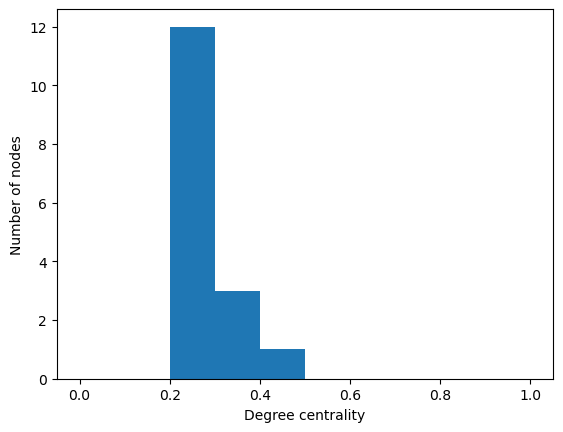

In [41]:
d_centrality = nx.degree_centrality(G_SW)
ls_centralities = list(d_centrality.values())
plt.hist(ls_centralities, bins=10, range=(0, 1))
plt.xlabel("Degree centrality")
plt.ylabel("Number of nodes")
plt.show()

In [ ]:
# Plot the degree distribution
d_degree = dict(G_SW.degree())
ls_degrees = list(d_degree.values())
plt.hist(ls_degrees, bins=10)
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

---


## 3. Preferential Attachment Model

The Barabási-Albert preferential attachment model has two parameters: the number of nodes $N$, and the number of links added at each step $m$. Given these parameters, the algorithm is as follows:

1. Start with a clique of $m + 1$ nodes.
2. Select $m$ different nodes at random, weighted by their degree.
3. Add a new node $i$ and link it with the $m$ nodes from the previous step.
4. Repeat 2-3 until there are N nodes in the graph.


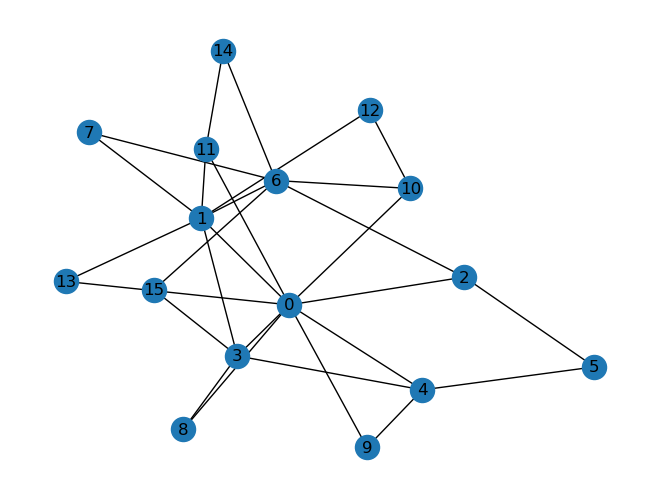

In [42]:
# Barabasi-Albert preferential attachment graph with n nodes and m edges
G_BA = nx.barabasi_albert_graph(n=16, m=2)

nx.draw(G_BA, with_labels=True)
plt.show()

In [43]:
print("Is connected?", nx.is_connected(G_BA))
print("Number of connected components:", nx.number_connected_components(G_BA))
print("Average shortest path length:", nx.average_shortest_path_length(G_BA))
print("Average clustering coefficient:", nx.average_clustering(G_BA))

Is connected? True
Number of connected components: 1
Average shortest path length: 2.0166666666666666
Average clustering coefficient: 0.3369047619047619


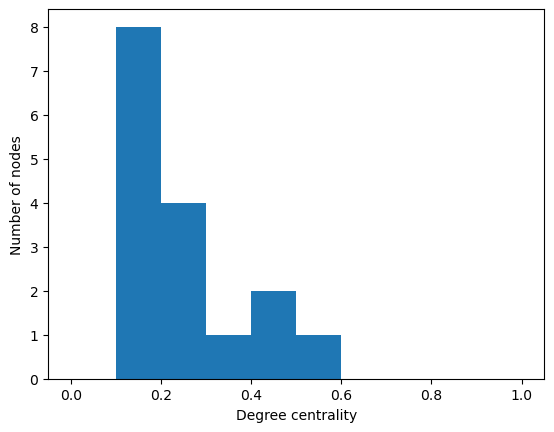

In [44]:
d_centrality = nx.degree_centrality(G_BA)
ls_centralities = list(d_centrality.values())
plt.hist(ls_centralities, bins=10, range=(0, 1))
plt.xlabel("Degree centrality")
plt.ylabel("Number of nodes")
plt.show()

---
